In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
IceCream = pd.read_csv(r'/IceCream.csv')
IceCream.head(100)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
95,9.018860,212.591740
96,20.265012,474.749392
97,19.363153,460.402500
98,14.685944,343.362905


In [ ]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


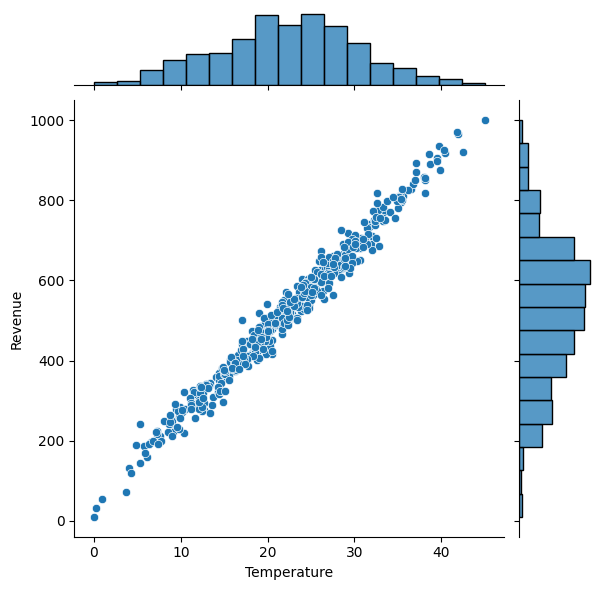

In [ ]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream)

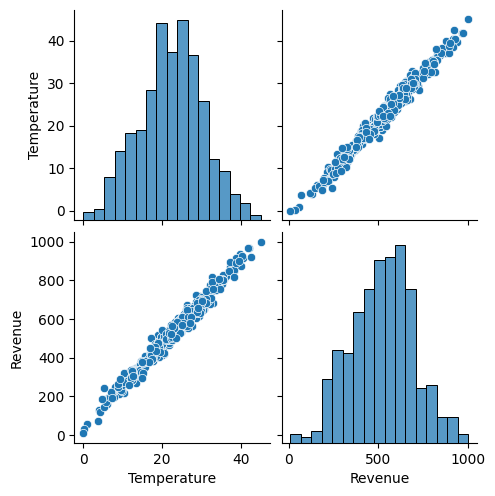

In [ ]:
sns.pairplot(IceCream)

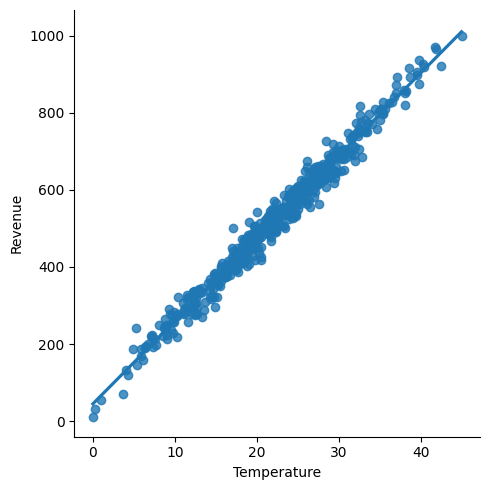

In [ ]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

In [ ]:
y = IceCream['Revenue']

In [ ]:
X = IceCream[['Temperature']]

In [ ]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_train.shape

(375, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor  = LinearRegression(fit_intercept =True)

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.4676156]
Linear Model Coefficient (b):  44.104951851985504


In [ ]:
y_pred = regressor.predict(X_test)
y_test

20     612.153949
276    535.708920
425    450.708589
439    264.123914
385    278.418265
          ...    
322    463.480508
72     643.648601
477    682.808566
459    526.547065
405    242.509855
Name: Revenue, Length: 125, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature Ice Cream Stand(Training dataset)')

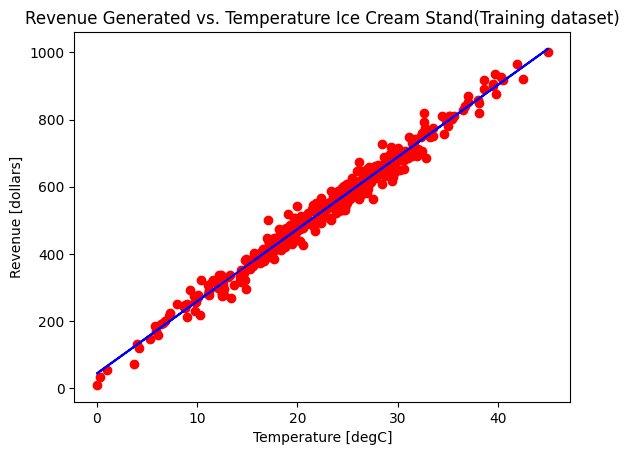

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Hours Ice Cream Stand (Test dataset)')

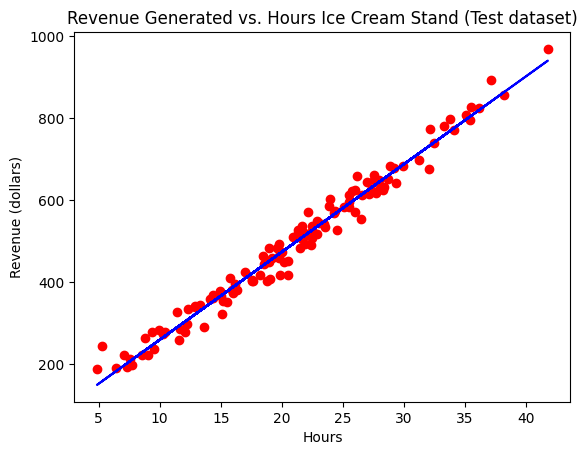

In [ ]:
#VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, regressor.predict (X_test), color = 'blue')
plt.ylabel('Revenue (dollars)')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours Ice Cream Stand (Test dataset)')

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('R2 score', r2_score(y_test,y_pred))
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 score 0.9778277188752224
Mean Absolute Error 19.909938925872133
Mean Squared Error 641.3951329487671
Root Mean Squared Error 25.325780006719775


Conclusion:

there is a linear relation between temperature and revenue and R2_Score is 97.7%


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing dataset and declaring independent and dependent variable #the dependent variable is in last column, hence y is assigned with [: lumn)
ds = pd.read_csv('/50_Startups.csv')
x = ds.iloc[:,:-1].values
y = ds.iloc[:,-1].values

In [ ]:
ds.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
ds.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [ ]:
#categorical data found in column [3]
#encoding categorical data using OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoding', OneHotEncoder(), [3])], remainder = 'passthrough')
x= np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [ ]:
#splitting dataset in training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=0)

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, lr.predict(x_test))

0.9347068473282546

Conclusion:

there  are multiple independent variable and one dependent variable we have applied multiple linear regression to find the realationship between the independent and dependent variable the R2_score is 93.4%    Higher the R2_Score better the fit of the model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [ ]:
dataset = pd.read_csv(r'/PositionSalaries_Data.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

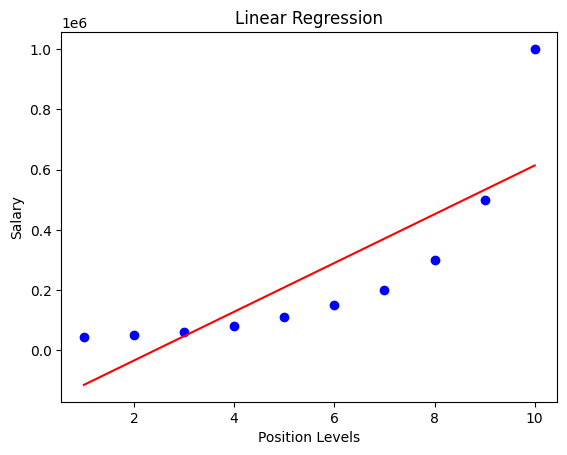

In [ ]:
#Visulaizing the result for Linear Regression model
plt.scatter (X, y, color="blue")
plt.plot(X, regressor.predict (X), color="red")
plt.title("Linear Regression")
plt.xlabel("Position Levels")
plt.ylabel("Salary")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

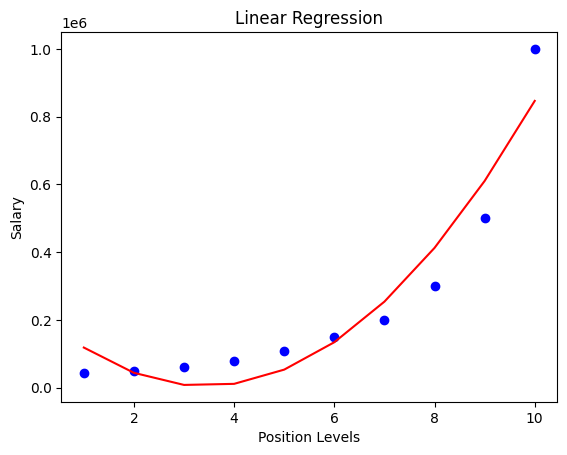

In [ ]:
# Visulaizing the result for Linear Regression model
plt.scatter (X, y, color="blue")
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)),color="red")
plt.title("Linear Regression")
plt.xlabel("Position Levels")
plt.ylabel("Salary")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_regs =  PolynomialFeatures (degree =  3)
X_polyn  = poly_regs.fit_transform(X)
lin_reg  = LinearRegression()
lin_reg.fit (X_polyn, y)

LinearRegression()

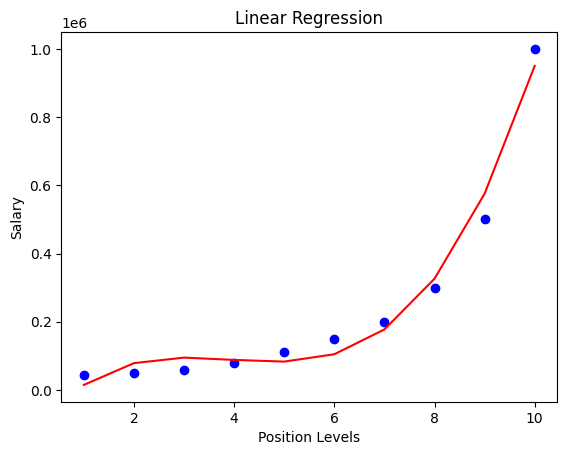

In [ ]:
#Visulaizing the result for Linear Regression model
plt.scatter (X,y,color="blue")
plt.plot(X, lin_reg.predict(poly_regs.fit_transform(X)),color="red")
plt.title("Linear Regression")
plt.xlabel("Position Levels")
plt.ylabel("Salary")
plt.show()

In [ ]:
poly_pred  = lin_reg.predict(poly_regs.fit_transform([[6.5]]))
print(poly_pred)

[133259.46969697]


Conclusion:

As the degree increases the model train well with the data and fit more accurately